### Avaliação do Modelo de Linguagem:

Este notebook tem como objetivo avaliar a qualidade do modelo de linguagem construído e salvo pelo notebook "modelTrain.ipynb". 

In [2]:
import gensim
import pandas as pd
import numpy as np 
import spacy
from gensim.models import Word2Vec,KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity


import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

Primeiramente, vamos ler os dados de analogias, e definir a função que realiza a avaliação nestes dados.

Obs.: Os dados de analogias contém apenas as linhas com 4 palavras, as linhas que continham uma espécie de título/tema da analogia foram apagadas para facilitar a leitura. 

In [3]:
data_path = 'C:\\Users\\gcram\\Documents\\Datasets\\analogies.txt'
with open(data_path, 'r') as file:
    Lines = file.readlines()

Essa é a função que calcula o erro da palavra predita, assim como pedido na especificação: se A está para B, logo C está para X; o modelo prediz a palavra X, a partir das palavras A,B e C. Depois disso, é calculada o erro desta palavra que é basicamente a diferença as respresentaões vetoriais da palavra predita e da verdadeira. Esse erro é acumulado por todos os exemplos que temos para então chegarmos em um score final. 

In [10]:

def run_evaluation(Lines,wv):
    no_words  = 0
    def analogy(worda, wordb, wordc):
        result = wv.most_similar(negative=[worda], 
                                    positive=[wordb, wordc])
        return result[0][0]
    error = []
    for line in Lines:
        l = line.lower().strip().split(' ')
        try:
            pred = analogy(l[0],l[1],l[2])
            error.append(((wv[l[3]] - wv[pred])**2).sum())
        except:
            no_words +=1
          #  print('excpt')
    return np.sqrt(np.mean(error))


In [11]:
res_cb = {}
res_sk = {}

for ws in ['5','10','20','100']:
    res_cb[ws] = {}
    res_sk[ws] = {}
    for ts in ['20','50','100','200']:
        model = Word2Vec.load(f"word2vec{ws}_{ts}_skip-gram.model")
        error = run_evaluation(Lines,model.wv)
        res_sk[ws][ts] = error
        model = Word2Vec.load(f"word2vec{ws}_{ts}_cbow.model")
        error = run_evaluation(Lines,model.wv)
        res_cb[ws][ts] = error
        

In [12]:
cb = pd.DataFrame(res_cb)
sk = pd.DataFrame(res_sk)
#for i in tdqm(range(5)):

O resultado é mostrado no mapa de calor abaixo. Vale relembrar que quanto menor o valor, melhor é o resultado, já que se trata de valor de erro. 


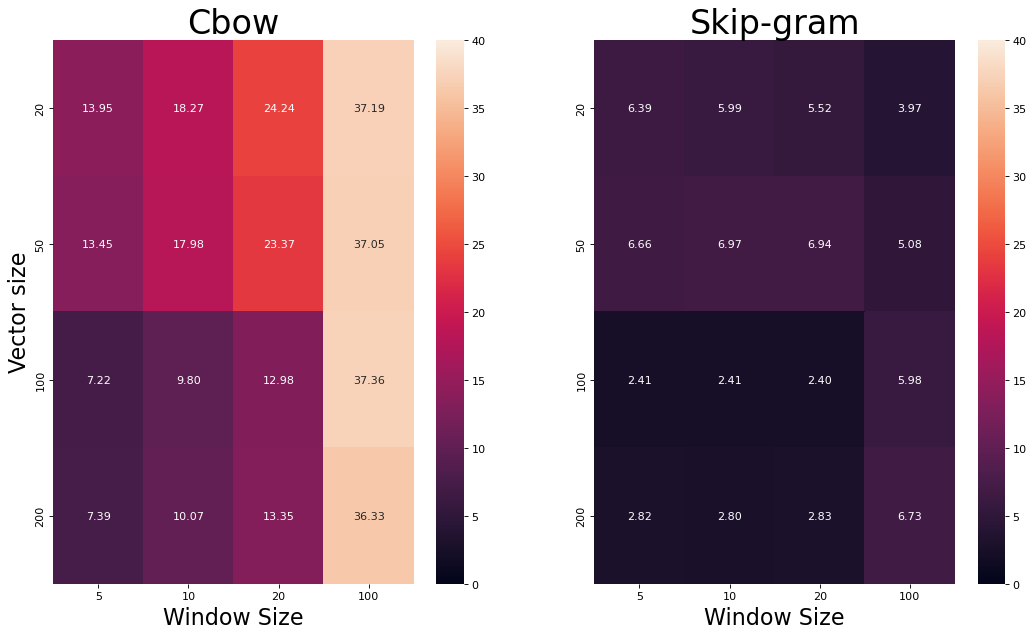

In [14]:

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,9), dpi=80)
sns.heatmap(cb, ax=ax1, vmin=0, vmax=40,annot=True, fmt='.2f')
sns.heatmap(sk, ax=ax2, vmin=0, vmax=40,annot=True, fmt='.2f')
ax1.set_xlabel('Window Size',fontsize = 20)
ax1.set_ylabel('Vector size', fontsize = 20)
ax2.set_xlabel('Window Size', fontsize = 20)
ax1.set_title('Cbow',fontsize= 30) 
ax2.set_title('Skip-gram',fontsize= 30) 
plt.show()

### Conclusão: 
Após o desemvolvimento do trabbalho e a análise dos resultados foi possível concluir que em linhas gerais o skip-gram se saiu melhor que o cbow. Principalmente ao se considerar uma janela de tamanho maior (100) o algoritmo não consegui processar bem todo o conetxto para encontrar uma boa representação para as palavras, resultando em um valor elevado de erro. 
Além disso o Cbow mostra uma grande sensibilidade aos hiperparâmetros, já que os valores apresentados acima mostraram uma grande variância. 

Já o Skip-gram mostrou resultados bem mais satisfatórios, e, em certas ocasioes houve um valor bem baixo de erro. É possível notar que a variância dos resultados também foi bem baixa. 

Em suma, o modelo cbow, com essas configurações não conseguiu lidar bem com tamanhos elevados de janelas, resultando em um desempenho não satisfatório. 
Todas as execuções foram executadas no meu computador pessoal e grastaram um tempo considerável. Se não fosse isso, mais análises seriam feitas. 

O trabalho foi uma grande oportunidade de aprendizado. Mesmos sendo um aluno com um sólido conhecimento em machine Learning, eu não tinha nenhum conhcimento em NLP, até então. Apesar do surgimento de certas dificuldades no início, hoje estou muito mais proparada para lidar com um problema de NLP.